In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(r"..\\Data\\india_data\\nifty50_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.sort_values("Date", inplace=True)
df.head(5)

,Index Name,Date,PE,PB,Div Yield,Close,Earnings
6513,NIFTY 50,1999-01-01,11.62,2.07,1.83,890.80,76.66
6512,NIFTY 50,1999-01-04,11.72,2.08,1.81,897.80,76.60
6511,NIFTY 50,1999-01-05,11.84,2.11,1.79,907.20,76.62
6510,NIFTY 50,1999-01-06,12.11,2.16,1.75,928.25,76.65
6509,NIFTY 50,1999-01-07,12.46,2.22,1.71,954.70,76.62


In [4]:
df.shape

(6514, 7)

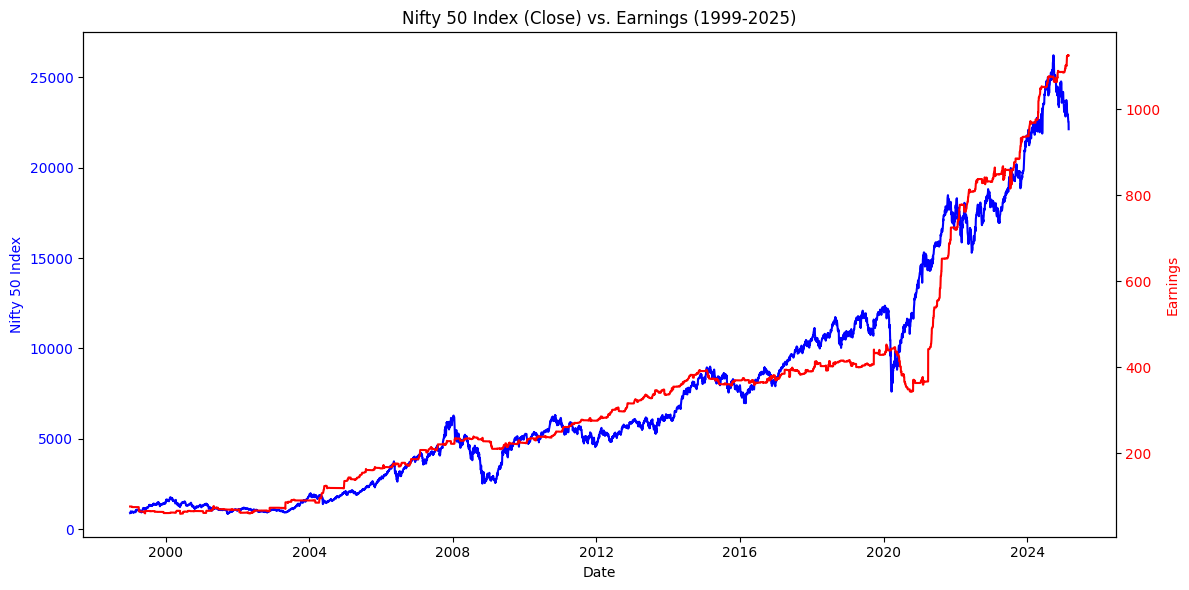

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Date"], df["Close"], color="blue", label="Nifty 50 Index")
ax1.set_xlabel("Date")
ax1.set_ylabel("Nifty 50 Index", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
#ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Earnings"], color="red", label="Earnings")
ax2.set_ylabel("Earnings", color="red")
ax2.tick_params(axis="y", labelcolor="red")
#ax2.set_yscale('log')

plt.title("Nifty 50 Index (Close) vs. Earnings (1999-2025)")
fig.tight_layout()
plt.show()

In [5]:
correlation = df["Close"].corr(df["Earnings"])
print(correlation)

0.9734448201561632


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


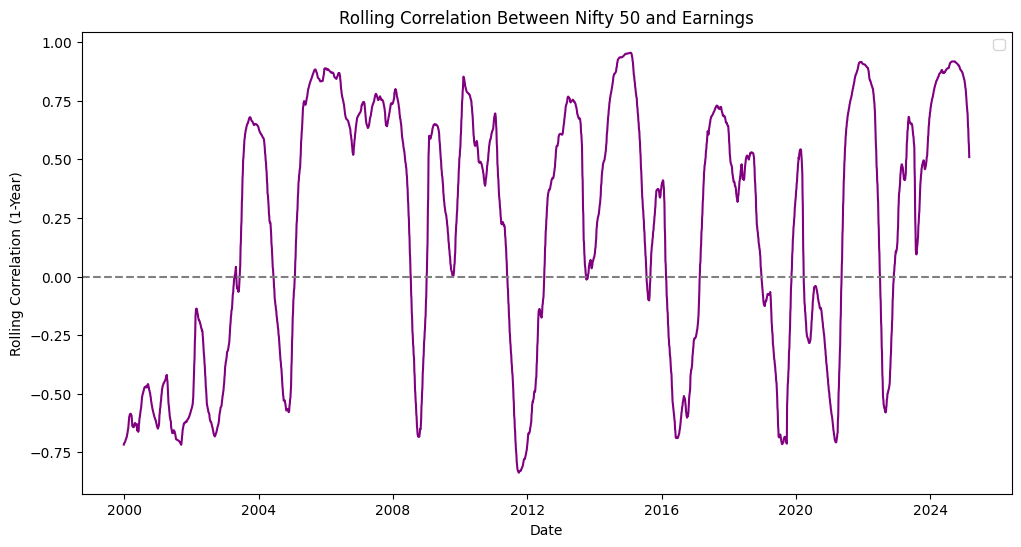

In [6]:
df["Rolling_Corr"] = df["Close"].rolling(252).corr(df["Earnings"])  # 252 trading days

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Rolling_Corr"], color="purple")
plt.axhline(0, linestyle="--", color="gray")

plt.xlabel("Date")
plt.ylabel("Rolling Correlation (1-Year)")
plt.title("Rolling Correlation Between Nifty 50 and Earnings")
plt.legend()
plt.show()

Roughly linear relation b/w Nifty 50 and its earnings

In [12]:
df_datefiltered = df[df["Date"] >= pd.to_datetime("2016-04-01")]
df_datefiltered.shape

(2211, 7)

In [14]:
correlation = df_datefiltered["Close"].corr(df_datefiltered["Earnings"])
print(correlation)

0.9506594943539252


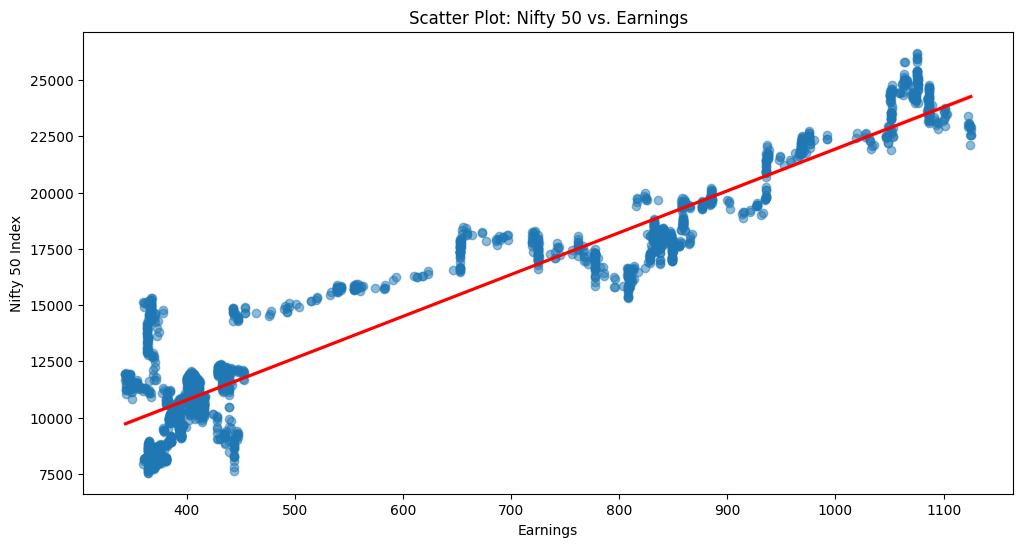

In [15]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df_datefiltered["Earnings"], y=df_datefiltered["Close"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Earnings")
plt.ylabel("Nifty 50 Index")
plt.title("Scatter Plot: Nifty 50 vs. Earnings")
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_4300\703495993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datefiltered["Rolling_Corr"] = df_datefiltered["Close"].rolling(252).corr(df_datefiltered["Earnings"])  # 252 = ~1 year


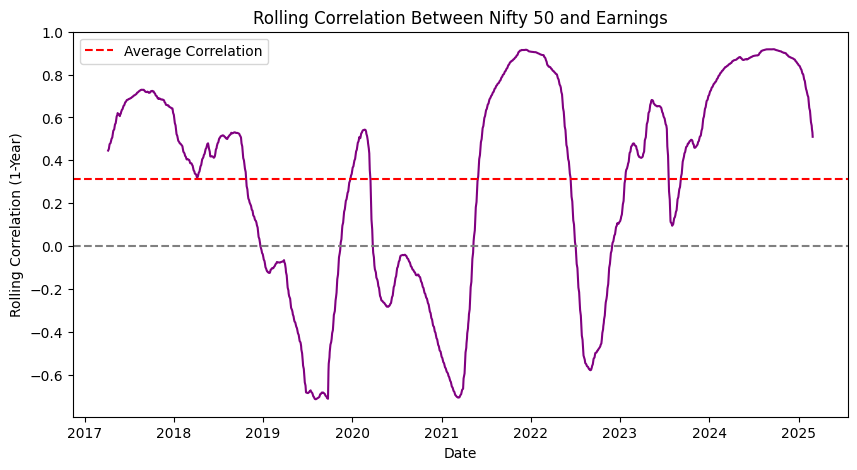

In [17]:
df_datefiltered["Rolling_Corr"] = df_datefiltered["Close"].rolling(252).corr(df_datefiltered["Earnings"])  # 252 = ~1 year

plt.figure(figsize=(10, 5))
plt.plot(df_datefiltered["Date"], df_datefiltered["Rolling_Corr"], color="purple")
plt.axhline(0, linestyle="--", color="gray")
plt.axhline(df_datefiltered["Rolling_Corr"].mean(), linestyle="--", color="red", label="Average Correlation")

plt.xlabel("Date")
plt.ylabel("Rolling Correlation (1-Year)")
plt.title("Rolling Correlation Between Nifty 50 and Earnings")
plt.legend()
plt.show()

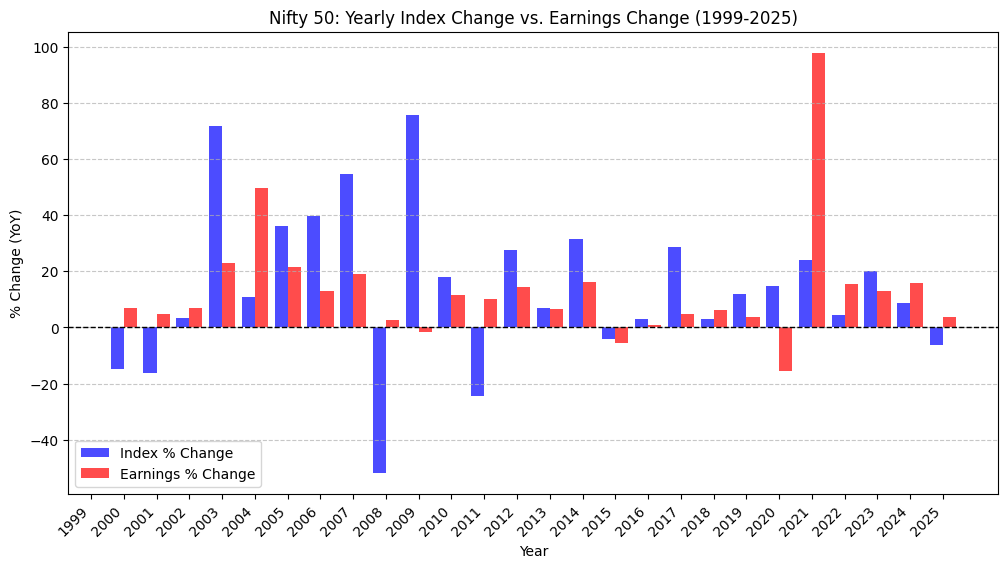

In [ ]:

df['Year'] = df['Date'].dt.year
df_yearly = df.groupby('Year').agg({'Close': 'last', 'Earnings': 'last'})

df_yearly['Index_YoY'] = df_yearly['Close'].pct_change() * 100
df_yearly['Earnings_YoY'] = df_yearly['Earnings'].pct_change() * 100

years = df_yearly.index.astype(str)  
index_changes = df_yearly['Index_YoY']
earnings_changes = df_yearly['Earnings_YoY']

x = np.arange(len(years))  
width = 0.4  

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, index_changes, width, label='Index % Change', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, earnings_changes, width, label='Earnings % Change', color='red', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('% Change (YoY)')
ax.set_title('Nifty 50: Yearly Index Change vs. Earnings Change (1999-2025)')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45, ha='right')
ax.axhline(0, color='black', linestyle='--', linewidth=1) 
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()